In [1]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense

C:\Users\Binvant\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Binvant\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Binvant\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Binvant\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

### Importing the EPL dataset

In [2]:
data = pd.read_csv("EPL_Set.csv")

### Data exploration to check for NaN values and fill them

In [3]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


 We find that the columns "HTHG", "HTAG" and "HTR" are incomplete and plot a heatmap of the dataset below to visualize them better.

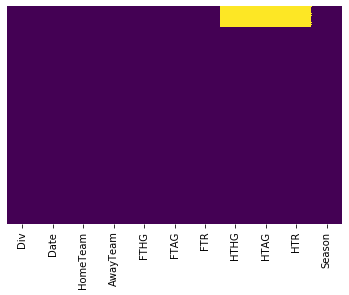

In [5]:
sns.heatmap(data.isnull(),cmap="viridis",yticklabels=False,cbar=False)


We fill the "HTHG" and "HTAG" columns having NaN values with the mean value of the respective coloumns and then perform some data corrections to omit any abnormality. 

In [6]:
data["HTHG"]=data["HTHG"].fillna(value=math.ceil(data["HTHG"].mean()))

In [7]:
data["HTAG"]=data["HTAG"].fillna(value=math.ceil(data["HTAG"].mean()))

In [8]:
def hthg(cols):
    HTHG=cols[0]
    FTHG=cols[1]
    if FTHG == 0:
        return 0
    else:
        return HTHG

In [9]:
def htag(cols):
    HTAG=cols[0]
    FTAG=cols[1]
    if FTAG == 0:
        return 0
    else:
        return HTAG

In [10]:
data["HTHG"]=data[["HTHG","FTHG"]].apply(hthg,axis=1)

In [11]:
data["HTAG"]=data[["HTAG","FTAG"]].apply(hthg,axis=1)

In [12]:
data.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,0.0,1.0,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,1.0,1.0,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,1.0,1.0,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,1.0,1.0,NaN,1993-94
5,E0,14/08/93,Newcastle,Tottenham,0,1,A,0.0,1.0,NaN,1993-94
6,E0,14/08/93,Oldham,Ipswich,0,3,A,0.0,1.0,NaN,1993-94
7,E0,14/08/93,Sheffield United,Swindon,3,1,H,1.0,1.0,NaN,1993-94
8,E0,14/08/93,Southampton,Everton,0,2,A,0.0,1.0,NaN,1993-94
9,E0,14/08/93,West Ham,Wimbledon,0,2,A,0.0,1.0,NaN,1993-94


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      9664 non-null   float64
 8   HTAG      9664 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


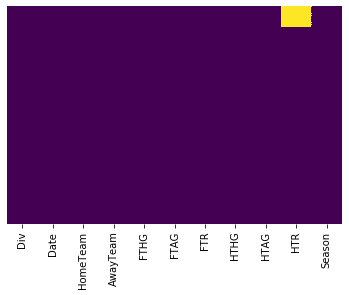

In [14]:
sns.heatmap(data.isnull(),cmap="viridis",yticklabels=False,cbar=False)

We can see from above that only the "HTR" columns have NaN values now. We write a function for it and fill in the values instead of NaN using the "HTHG" and "HTAG" coloumns.

In [15]:
def htr(cols):
    HTR=cols[0]
    HTHG=cols[1]
    HTAG=cols[2]
    if pd.isnull(HTR):
        if HTHG>HTAG:
            return "H"
        elif HTAG>HTHG:
            return "A"
        else:
            return "D"
    else:
        return HTR

In [16]:
data["HTR"]=data[["HTR","HTHG","HTAG"]].apply(htr,axis=1)

In [17]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,0.0,1.0,A,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,1.0,1.0,D,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,1.0,1.0,D,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,H,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,1.0,1.0,D,1993-94


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      9664 non-null   float64
 8   HTAG      9664 non-null   float64
 9   HTR       9664 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


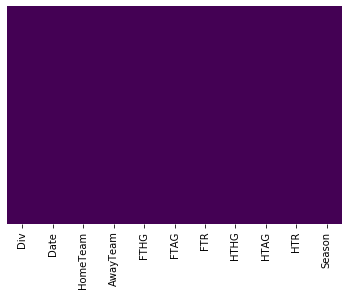

In [19]:
sns.heatmap(data.isnull(),cmap="viridis",yticklabels=False,cbar=False)

Now all NaN values in the dataset have been filled and we can proceed with our complete dataset.

#### Since we have a complete dataset, we need to convert the string entries to entries that can be accepted by the model.

We will first convert the "HTR" and "FTR" columns and produce dummies for them

HTR column conversion and column order re-adjustments.

In [20]:
b=pd.get_dummies(data["HTR"],prefix="HTR")
data=pd.concat([data,b],axis=1)

In [21]:
data.drop("HTR",axis=1,inplace=True)
m=data["Season"]
data.drop("Season",axis=1,inplace=True)
data.insert(12,"Season",m)

In [22]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR_A,HTR_D,HTR_H,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,0.0,1.0,1,0,0,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,1.0,1.0,0,1,0,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,1.0,1.0,0,1,0,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,0,0,1,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,1.0,1.0,0,1,0,1993-94


FTR column conversion and column reordering

Dropping columns deemed not necessary

In [23]:
data.drop("Div",axis=1,inplace=True)
data.drop("Date",axis=1,inplace=True)

Converting data type to int for better readabilty.

In [24]:
data["HTHG"]=data["HTHG"].astype(int)
data["HTAG"]=data["HTAG"].astype(int)

In [25]:
data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR_A,HTR_D,HTR_H,Season
0,Arsenal,Coventry,0,3,A,0,1,1,0,0,1993-94
1,Aston Villa,QPR,4,1,H,1,1,0,1,0,1993-94
2,Chelsea,Blackburn,1,2,A,1,1,0,1,0,1993-94
3,Liverpool,Sheffield Weds,2,0,H,1,0,0,0,1,1993-94
4,Man City,Leeds,1,1,D,1,1,0,1,0,1993-94


**Converting "Season" column from object type to a suitable type that can be accepted by the model** 

In [26]:
new=[]
end=[]
for index in data["Season"]:
    new.append(index.split("-")[0])
    end.append(index.split("-")[1])

In [27]:
data["Season S_Year"]=new
data["Season E_Year"]=end
data.drop("Season",axis=1,inplace=True)

In [28]:
data["Season S_Year"]=data["Season S_Year"].astype(int)
data["Season E_Year"]=data["Season E_Year"].astype(int)

In [29]:
data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR_A,HTR_D,HTR_H,Season S_Year,Season E_Year
0,Arsenal,Coventry,0,3,A,0,1,1,0,0,1993,94
1,Aston Villa,QPR,4,1,H,1,1,0,1,0,1993,94
2,Chelsea,Blackburn,1,2,A,1,1,0,1,0,1993,94
3,Liverpool,Sheffield Weds,2,0,H,1,0,0,0,1,1993,94
4,Man City,Leeds,1,1,D,1,1,0,1,0,1993,94


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HomeTeam       9664 non-null   object
 1   AwayTeam       9664 non-null   object
 2   FTHG           9664 non-null   int64 
 3   FTAG           9664 non-null   int64 
 4   FTR            9664 non-null   object
 5   HTHG           9664 non-null   int32 
 6   HTAG           9664 non-null   int32 
 7   HTR_A          9664 non-null   uint8 
 8   HTR_D          9664 non-null   uint8 
 9   HTR_H          9664 non-null   uint8 
 10  Season S_Year  9664 non-null   int32 
 11  Season E_Year  9664 non-null   int32 
dtypes: int32(4), int64(2), object(3), uint8(3)
memory usage: 556.9+ KB


In [31]:
X_all = data.drop(['FTR','Season S_Year','Season E_Year','FTAG','FTHG'],1)
Y_all=data.drop(['HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG','HTR_A','HTR_D','HTR_H','Season S_Year','Season E_Year'],1)

**Segregating data into Features(X) and Labels(Y)**

In [32]:
Y_all

,FTR
0,A
1,H
2,A
3,H
4,D
...,...
9659,H
9660,A
9661,A
9662,H


In [33]:
X_all

,HomeTeam,AwayTeam,HTHG,HTAG,HTR_A,HTR_D,HTR_H
0,Arsenal,Coventry,0,1,1,0,0
1,Aston Villa,QPR,1,1,0,1,0
2,Chelsea,Blackburn,1,1,0,1,0
3,Liverpool,Sheffield Weds,1,0,0,0,1
4,Man City,Leeds,1,1,0,1,0
...,...,...,...,...,...,...,...
9659,Newcastle,Chelsea,1,0,0,0,1
9660,Southampton,Man City,0,0,0,1,0
9661,Swansea,Stoke,1,2,1,0,0
9662,Tottenham,Leicester,1,2,1,0,0


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_all['HomeTeam'] = le.fit_transform(data.HomeTeam.values)
X_all['AwayTeam'] = le.fit_transform(data.AwayTeam.values)
Y_all['FTR'] = le.fit_transform(data.FTR.values)


As it is better to just pass numerical inputs, here we Change the string inputs to numerical inputs 

In [35]:
X_all


,HomeTeam,AwayTeam,HTHG,HTAG,HTR_A,HTR_D,HTR_H
0,0,14,0,1,1,0,0
1,1,34,1,1,0,1,0
2,13,4,1,1,0,1,0
3,24,37,1,0,0,0,1
4,25,22,1,1,0,1,0
...,...,...,...,...,...,...,...
9659,29,13,1,0,0,0,1
9660,38,25,0,0,0,1,0
9661,41,39,1,2,1,0,0
9662,43,23,1,2,1,0,0


In [36]:
Y_all

,FTR
0,0
1,2
2,0
3,2
4,1
...,...
9659,2
9660,0
9661,0
9662,2


In [37]:
from sklearn.model_selection import train_test_split

#Shuffle and split the dataset into training and testing set.
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, 
                                                    test_size = 0.33,
                                                   random_state = 42,
                                                   stratify = Y_all)

**Splitting into train,test data**

In [38]:
X_train

,HomeTeam,AwayTeam,HTHG,HTAG,HTR_A,HTR_D,HTR_H
5896,25,13,1,1,0,1,0
3825,27,1,2,2,0,1,0
1008,24,14,0,0,0,1,0
511,31,37,1,1,0,1,0
4475,15,29,0,0,0,1,0
...,...,...,...,...,...,...,...
2916,24,23,0,0,0,1,0
1718,43,1,1,1,0,1,0
5840,47,35,0,0,0,1,0
7910,45,30,0,1,1,0,0


In [39]:
X_test

,HomeTeam,AwayTeam,HTHG,HTAG,HTR_A,HTR_D,HTR_H
4555,15,1,1,0,0,0,1
2264,0,24,0,0,0,1,0
1434,13,29,1,1,0,1,0
3172,25,46,1,0,0,0,1
3113,26,23,0,0,0,1,0
...,...,...,...,...,...,...,...
5204,12,25,1,0,0,0,1
5197,29,12,0,0,0,1,0
5951,46,0,0,0,0,1,0
572,15,17,1,0,0,0,1


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)  

**StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.**

In [41]:
X = np.squeeze(np.asarray(X_train))
Y = np.squeeze(np.asarray(Y_train))
Y_test = np.squeeze(np.asarray(Y_test))
X_test= np.squeeze(np.asarray(X_test))

In [42]:
X

array([[ 0.04276062, -0.77764488,  0.37651271, ..., -0.52814878,
         1.13153896, -0.72314299],
       [ 0.18114216, -1.60045045,  1.61321654, ..., -0.52814878,
         1.13153896, -0.72314299],
       [-0.02643015, -0.70907775, -0.86019113, ..., -0.52814878,
         1.13153896, -0.72314299],
       ...,
       [ 1.56495756,  0.73083198, -0.86019113, ..., -0.52814878,
         1.13153896, -0.72314299],
       [ 1.42657602,  0.38799633, -0.86019113, ...,  1.89340588,
        -0.88375216, -0.72314299],
       [-0.02643015,  1.48507042,  0.37651271, ..., -0.52814878,
        -0.88375216,  1.38285238]])

In [43]:
Y

array([0, 0, 1, ..., 1, 0, 2])

In [44]:
Y_test

array([2, 1, 1, ..., 0, 2, 1])

In [45]:
X_test

array([[-0.64914708, -1.60045045,  0.37651271, ..., -0.52814878,
        -0.88375216,  1.38285238],
       [-1.68700863, -0.02340645, -0.86019113, ..., -0.52814878,
         1.13153896, -0.72314299],
       [-0.78752862,  0.3194292 ,  0.37651271, ..., -0.52814878,
         1.13153896, -0.72314299],
       ...,
       [ 1.49576679, -1.66901758, -0.86019113, ..., -0.52814878,
         1.13153896, -0.72314299],
       [-0.64914708, -0.50337636,  0.37651271, ..., -0.52814878,
        -0.88375216,  1.38285238],
       [ 0.59628678,  0.38799633, -0.86019113, ...,  1.89340588,
        -0.88375216, -0.72314299]])

In [46]:
X.shape

(6474, 7)

In [47]:
m=X.shape[0]
m

6474

**Where m=number of training examples**

In [48]:
model = keras.Sequential([
    keras.layers.Dense(7,input_shape=(7,)),  # input layer (1)
    keras.layers.Dense(6, activation=tf.nn.relu),#hidden layer(2)
     keras.layers.Dense(4, activation=tf.nn.relu),# hidden layer (3)
    keras.layers.Dense(3, activation=tf.nn.softmax) # output layer (4)
])

Instructions for updating:
Colocations handled automatically by placer.


**Implementing a 4 layer Neural network with 2 hidden layers. The ReLu activation function is used in Hidden layers while Softmax Function is used in the Output Layer.** 

In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.fit(X, Y, epochs=40)

Epoch 1/40
6474/6474 [==============================] - 0s 65us/sample - loss: 1.0948 - acc: 0.4603
Epoch 2/40
6474/6474 [==============================] - 0s 36us/sample - loss: 0.9668 - acc: 0.5987
Epoch 3/40
6474/6474 [==============================] - 0s 38us/sample - loss: 0.9286 - acc: 0.6067
Epoch 4/40
6474/6474 [==============================] - 0s 36us/sample - loss: 0.9025 - acc: 0.6137
Epoch 5/40
6474/6474 [==============================] - 0s 38us/sample - loss: 0.8835 - acc: 0.6138
Epoch 6/40
6474/6474 [==============================] - 0s 37us/sample - loss: 0.8708 - acc: 0.6149
Epoch 7/40
6474/6474 [==============================] - 0s 37us/sample - loss: 0.8608 - acc: 0.6124
Epoch 8/40
6474/6474 [==============================] - 0s 37us/sample - loss: 0.8544 - acc: 0.6135
Epoch 9/40
6474/6474 [==============================] - 0s 37us/sample - loss: 0.8484 - acc: 0.6109
Epoch 10/40
6474/6474 [==============================] - 0s 38us/sample - loss: 0.8438 - acc: 0.6135

**As seen above, the accuracy on first epoch was just 56.9% but then it improved and we achieved 61% accuracy.**


In [51]:
for layer in model.layers:
    weights = layer.get_weights()

In [52]:
weights


[array([[ 0.6299382 ,  0.6461588 , -0.17479119],
        [ 0.90466464,  0.89000297, -0.23680376],
        [ 0.46251607, -0.52089995, -0.885497  ],
        [ 0.9645495 ,  0.12215985, -0.36645523]], dtype=float32),
 array([-1.4826138, -0.5802837,  1.602112 ], dtype=float32)]

These are the weights of the different neuron connections, weights nearer to 0 indicate that changing output do not affect the output

In [53]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('test_acc:', test_acc, 'test_loss', test_loss)

3190/3190 [==============================] - 0s 36us/sample - loss: 0.8271 - acc: 0.6166
test_acc: 0.6166144 test_loss 0.8271317653521475


 **The accuracy(61.2%) and Test loss results are shown above**


In [54]:
prediction=model.predict_classes(X_test[:])

Here we try to see our predicted results. 

In [55]:
print(prediction)

[2 1 2 ... 1 2 0]


#1 means a draw
#2 represents Home Team win
#3 represents Away Team win

In [56]:
print(Y_test)

[2 1 1 ... 0 2 1]


In [57]:
def compare(y_pred, model_name):
    test_values=[np.count_nonzero(Y_test==0),np.count_nonzero(Y_test==1), np.count_nonzero(Y_test==2)]
    pred_values=[np.count_nonzero(prediction==0),np.count_nonzero(prediction==1), np.count_nonzero(prediction==2)]
    plt.figure()
    N=3
    width=0.35
    idx=np.arange(N)
    plt.bar(idx, test_values, width, label='True Vals')
    plt.bar(idx+width, pred_values, width, label='Predicted Vals')
    plt.ylabel('Number of Matches')
    plt.title(f'{model_name} Performance Measure per Category')
    plt.xticks(idx + width / 2, ('Away', 'Draw', 'Home'))
    plt.legend(loc='best')
    plt.show()

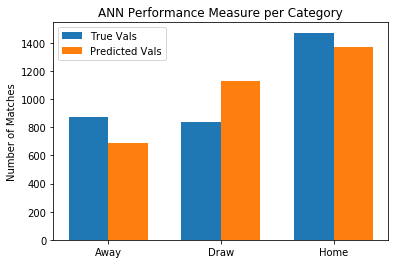

In [58]:
compare(prediction, 'ANN')

**Now, As our model had predicted Premier league's outcomes with 61.9% accuracy, We will further test it on La Liga's data to measure it's performance on various datasets. The 2018-2019 Season data was used for this purpose.**

In [59]:
data2=pd.read_csv("laliga.csv")

In [60]:
data2

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,SP1,17-08-2018,Betis,Levante,0,3,A,0,1,A
1,SP1,17-08-2018,Girona,Valladolid,0,0,D,0,0,D
2,SP1,18-08-2018,Barcelona,Alaves,3,0,H,0,0,D
3,SP1,18-08-2018,Celta,Espanol,1,1,D,0,1,A
4,SP1,18-08-2018,Villarreal,Sociedad,1,2,A,1,1,D
...,...,...,...,...,...,...,...,...,...,...
375,SP1,18-05-2019,Levante,Ath Madrid,2,2,D,2,0,H
376,SP1,18-05-2019,Sevilla,Ath Bilbao,2,0,H,1,0,H
377,SP1,18-05-2019,Valladolid,Valencia,0,2,A,0,1,A
378,SP1,19-05-2019,Eibar,Barcelona,2,2,D,2,2,D


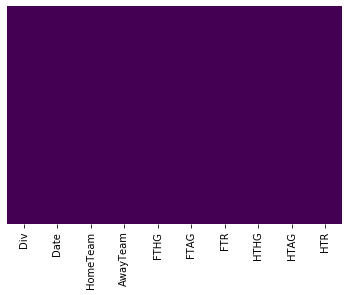

In [61]:
sns.heatmap(data2.isnull(),cmap="viridis",yticklabels=False,cbar=False)

From this heatmap, we can see that there are no NaN values in our dataset.

In [62]:
data2.drop("Div",axis=1,inplace=True)
data2.drop("Date",axis=1,inplace=True)
data2.drop("FTHG",axis=1,inplace=True)
data2.drop("FTAG",axis=1,inplace=True)

In [63]:
data2

,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR
0,Betis,Levante,A,0,1,A
1,Girona,Valladolid,D,0,0,D
2,Barcelona,Alaves,H,0,0,D
3,Celta,Espanol,D,0,1,A
4,Villarreal,Sociedad,A,1,1,D
...,...,...,...,...,...,...
375,Levante,Ath Madrid,D,2,0,H
376,Sevilla,Ath Bilbao,H,1,0,H
377,Valladolid,Valencia,A,0,1,A
378,Eibar,Barcelona,D,2,2,D


In [64]:
b=pd.get_dummies(data2["HTR"],prefix="HTR")
data2=pd.concat([data2,b],axis=1)

In [65]:
data2.drop("HTR",axis=1,inplace=True)

In [66]:
data2

,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR_A,HTR_D,HTR_H
0,Betis,Levante,A,0,1,1,0,0
1,Girona,Valladolid,D,0,0,0,1,0
2,Barcelona,Alaves,H,0,0,0,1,0
3,Celta,Espanol,D,0,1,1,0,0
4,Villarreal,Sociedad,A,1,1,0,1,0
...,...,...,...,...,...,...,...,...
375,Levante,Ath Madrid,D,2,0,0,0,1
376,Sevilla,Ath Bilbao,H,1,0,0,0,1
377,Valladolid,Valencia,A,0,1,1,0,0
378,Eibar,Barcelona,D,2,2,0,1,0


In [67]:
L1_all = data2.drop(['FTR'],1)
L2_all=data2.drop(['HomeTeam','AwayTeam','HTHG','HTAG','HTR_A','HTR_D','HTR_H'],1)

In [68]:
L1_all

,HomeTeam,AwayTeam,HTHG,HTAG,HTR_A,HTR_D,HTR_H
0,Betis,Levante,0,1,1,0,0
1,Girona,Valladolid,0,0,0,1,0
2,Barcelona,Alaves,0,0,0,1,0
3,Celta,Espanol,0,1,1,0,0
4,Villarreal,Sociedad,1,1,0,1,0
...,...,...,...,...,...,...,...
375,Levante,Ath Madrid,2,0,0,0,1
376,Sevilla,Ath Bilbao,1,0,0,0,1
377,Valladolid,Valencia,0,1,1,0,0
378,Eibar,Barcelona,2,2,0,1,0


In [69]:
L2_all

,FTR
0,A
1,D
2,H
3,D
4,A
...,...
375,D
376,H
377,A
378,D


Now, we will use LabelEncoding to convert into Numerical data

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
L1_all['HomeTeam'] = le.fit_transform(data2.HomeTeam.values)
L1_all['AwayTeam'] = le.fit_transform(data2.AwayTeam.values)
L2_all['FTR'] = le.fit_transform(data2.FTR.values)

In [71]:
L1_all


,HomeTeam,AwayTeam,HTHG,HTAG,HTR_A,HTR_D,HTR_H
0,4,12,0,1,1,0,0
1,9,17,0,0,0,1,0
2,3,0,0,0,0,1,0
3,5,7,0,1,1,0,0
4,19,15,1,1,0,1,0
...,...,...,...,...,...,...,...
375,12,2,2,0,0,0,1
376,14,1,1,0,0,0,1
377,17,16,0,1,1,0,0
378,6,3,2,2,0,1,0


In [72]:
L2_all

,FTR
0,0
1,1
2,2
3,1
4,0
...,...
375,1
376,2
377,0
378,1


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(L1_all)

L1_all= scaler.transform(L1_all)


In [74]:
L1_all

array([[-0.95382097,  0.43355498, -0.7998839 , ...,  1.70807663,
        -0.86204366, -0.68350674],
       [-0.086711  ,  1.30066495, -0.7998839 , ..., -0.58545383,
         1.16003406, -0.68350674],
       [-1.12724296, -1.64750894, -0.7998839 , ..., -0.58545383,
         1.16003406, -0.68350674],
       ...,
       [ 1.30066495,  1.12724296, -0.7998839 , ...,  1.70807663,
        -0.86204366, -0.68350674],
       [-0.60697698, -1.12724296,  2.1368879 , ..., -0.58545383,
         1.16003406, -0.68350674],
       [ 0.60697698, -0.95382097, -0.7998839 , ..., -0.58545383,
         1.16003406, -0.68350674]])

Now, converting L1_all and L2_all into arrays

In [75]:
L1_all= np.squeeze(np.asarray(L1_all))
L2_all= np.squeeze(np.asarray(L2_all))

In [76]:
L1_all

array([[-0.95382097,  0.43355498, -0.7998839 , ...,  1.70807663,
        -0.86204366, -0.68350674],
       [-0.086711  ,  1.30066495, -0.7998839 , ..., -0.58545383,
         1.16003406, -0.68350674],
       [-1.12724296, -1.64750894, -0.7998839 , ..., -0.58545383,
         1.16003406, -0.68350674],
       ...,
       [ 1.30066495,  1.12724296, -0.7998839 , ...,  1.70807663,
        -0.86204366, -0.68350674],
       [-0.60697698, -1.12724296,  2.1368879 , ..., -0.58545383,
         1.16003406, -0.68350674],
       [ 0.60697698, -0.95382097, -0.7998839 , ..., -0.58545383,
         1.16003406, -0.68350674]])

In [77]:
L2_all

array([0, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2,
       0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1,
       2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 2,
       0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 2,
       0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0,
       1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 1, 1,
       2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2,
       2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,

Now we will feed L1_all into our model using model.predict_classes()

In [78]:
pred=model.predict_classes(L1_all[:])

In [79]:
print(pred)

[0 2 1 0 2 0 2 0 2 0 2 0 1 1 1 2 2 2 1 0 2 2 1 1 2 0 2 1 2 0 2 1 2 1 1 2 0
 1 2 2 2 1 0 2 0 2 0 0 2 2 1 0 1 0 2 2 1 1 1 0 0 1 1 0 1 0 2 2 2 2 1 1 2 2
 1 2 2 1 2 1 2 0 1 1 0 2 0 1 1 2 0 1 2 2 2 2 0 2 1 1 1 2 1 1 2 0 1 2 1 2 2
 0 2 1 1 2 0 0 0 2 2 1 2 2 2 1 0 2 1 2 1 2 1 2 0 2 2 2 2 2 0 2 0 2 0 2 0 0
 0 1 1 0 2 2 0 2 2 0 1 1 1 0 2 1 2 2 2 2 2 0 2 0 2 1 0 2 0 0 2 2 2 2 1 2 1
 2 1 2 0 2 2 2 0 2 2 0 2 2 0 2 2 0 1 2 2 0 0 1 0 1 2 0 1 1 2 1 2 2 2 0 2 0
 0 2 0 1 2 0 2 2 0 2 0 1 1 2 2 1 2 0 2 1 2 2 2 2 0 0 0 2 0 2 2 0 1 0 1 0 1
 2 0 1 1 2 0 1 2 2 2 2 2 1 2 0 1 0 2 1 1 0 2 0 1 0 1 2 2 0 2 2 1 1 0 2 0 0
 2 2 2 2 1 1 0 2 2 2 0 1 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 1 1 0 2 0 1 1 1 1 1
 2 2 0 2 1 2 2 2 1 1 1 1 2 1 2 2 0 0 0 1 2 2 2 2 0 2 2 2 2 2 2 1 0 2 2 0 1
 2 0 1 2 0 2 2 0 2 1]


These are our **PREDICTED** outcomes

In [80]:
print(L2_all[:])

[0 1 2 1 0 0 2 0 2 1 2 1 1 2 0 2 0 1 1 0 2 1 0 2 2 2 2 2 1 0 1 1 0 1 2 0 0
 0 2 0 1 2 0 2 0 1 1 0 1 2 2 1 0 2 2 1 1 0 2 1 1 0 1 0 2 1 2 0 1 0 2 0 0 2
 2 2 2 1 2 0 2 0 1 1 0 1 0 0 1 1 1 1 2 2 2 2 2 2 2 2 1 2 0 0 1 2 1 1 1 2 0
 2 0 1 1 2 0 0 2 1 2 1 2 1 2 1 0 2 2 2 2 2 2 2 0 1 2 2 1 2 1 2 0 1 0 2 1 0
 0 2 1 1 2 2 0 0 1 0 2 1 1 0 1 2 2 1 1 2 2 1 2 1 2 2 0 1 0 0 1 0 2 1 2 1 0
 2 2 2 0 2 2 0 0 2 2 2 2 1 1 2 2 1 2 2 2 0 0 1 2 0 2 1 2 1 2 2 2 2 1 0 1 0
 2 2 0 1 2 1 1 2 1 2 0 2 0 1 0 1 2 0 1 1 2 2 0 2 1 0 0 1 0 2 2 0 0 0 2 0 2
 2 1 1 2 2 2 0 0 0 2 0 1 2 0 0 2 0 0 0 1 2 0 0 2 2 0 1 2 0 1 1 2 1 1 2 2 1
 2 2 2 2 2 0 2 2 1 2 2 2 1 0 2 2 1 2 2 0 1 2 1 1 1 2 2 0 1 0 2 1 2 2 0 2 2
 2 1 0 2 1 2 0 1 2 2 1 2 2 0 2 1 1 0 0 2 2 2 2 2 0 2 2 2 1 2 2 0 0 2 2 0 2
 2 1 2 1 2 1 2 0 1 0]


In [81]:
test_loss, test_acc = model.evaluate(L1_all, L2_all)
print('test_acc:', test_acc, 'test_loss', test_loss)

380/380 [==============================] - 0s 26us/sample - loss: 0.9483 - acc: 0.5132
test_acc: 0.5131579 test_loss 0.9482891854486968


**So as we can see, Our model's accuracy on La Liga's dataset was 51.58%**

In [84]:
def compare2(y_pred, model_name):
    test_values=[np.count_nonzero(L2_all==0),np.count_nonzero(L2_all==1), np.count_nonzero(L2_all==2)]
    pred_values=[np.count_nonzero(y_pred==0),np.count_nonzero(y_pred==1), np.count_nonzero(y_pred==2)]
    plt.figure()
    N=3
    width=0.35
    idx=np.arange(N)
    plt.bar(idx, test_values, width, label='True Vals')
    plt.bar(idx+width, pred_values, width, label='Predicted Vals')
    plt.ylabel('Number of Matches')
    plt.title(f'{model_name} Performance Measure per Category')
    plt.xticks(idx + width / 2, ('Away', 'Draw', 'Home'))
    plt.legend(loc='best')
    plt.show()

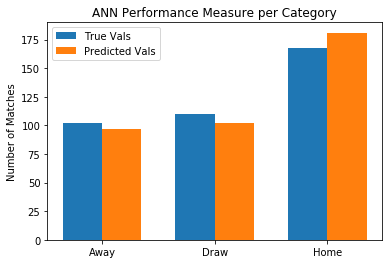

In [85]:
compare2(pred, 'ANN')